In [1]:
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# load the data
all_data = pd.read_csv('mnist_test.csv', header=None)
selected_data = all_data[all_data.iloc[:,0].isin([2, 7])] # label included
X = selected_data.iloc[:, 1:] # [n_samples, n_features]
labels = selected_data.iloc[:, 0].replace(2, 0).replace(7, 1).tolist() # change label 2 to 0, change label 7 to 1
n_samples = X.shape[0]

In [3]:
# compute the weighted matrix
def compute_weighted_matrix(data, sigma):
    init_mat = pairwise_distances(data, metric="euclidean")
    weighted_mat = np.exp(-init_mat**2/(2*sigma**2))
    return weighted_mat

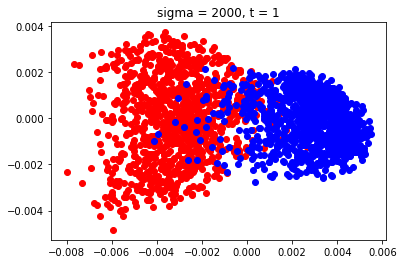

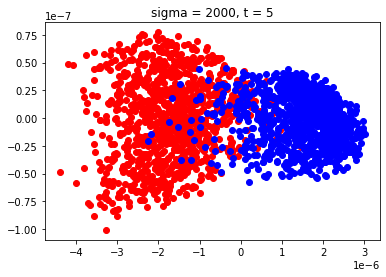

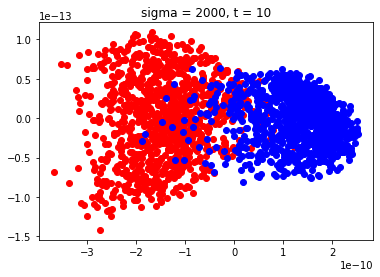

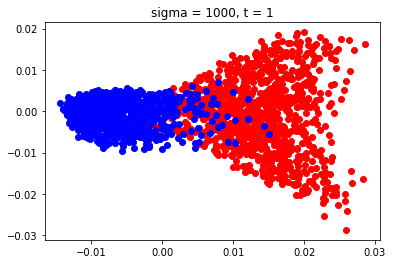

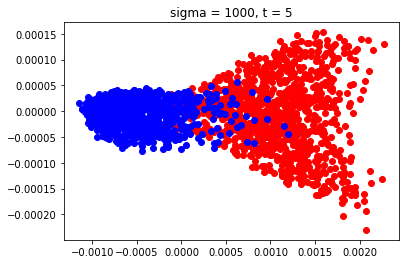

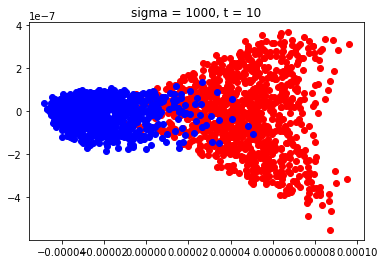

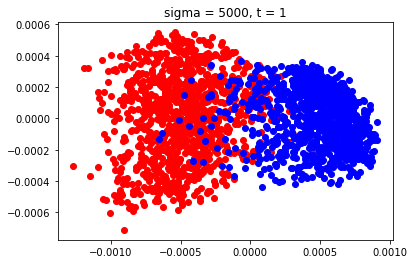

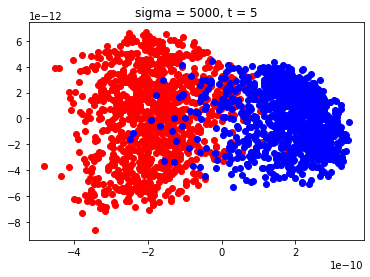

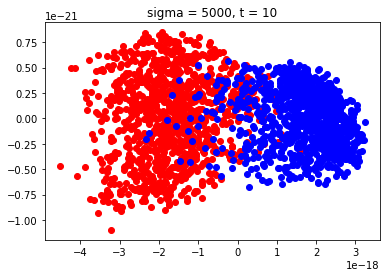

In [4]:
sigma_lst = [2000, 1000, 5000] # It's better to choose the median of pairwise distance

for sigma in sigma_lst:
    # compute the Markov transition matrix
    W = compute_weighted_matrix(X, sigma)
    D = np.diag(np.sum(W,axis = 1))
    D_inv = np.linalg.inv(D)
    P = np.dot(D_inv,W)
    
    # compute the eigenvalue and eigenvectors
    eigen_val, eign_vec = np.linalg.eig(P)
    eigen_val[::-1].sort()
    eign_vec2 = eign_vec[:,1]
    eign_vec3 = eign_vec[:,2]
    
    # compute the diffusion map for time [1, 5, 10]
    times = [1, 5, 10]
    for i in range(3): 
        vec2 = eigen_val[1] ** times[i] * eign_vec2
        vec3 = eigen_val[2] ** times[i] * eign_vec3
    
        plt.scatter([vec2[i] for i in range(n_samples) if labels[i] == 0],
                    [vec3[i] for i in range(n_samples) if labels[i] == 0], c = 'red')
        plt.scatter([vec2[i] for i in range(n_samples) if labels[i] == 1],
                    [vec3[i] for i in range(n_samples) if labels[i] == 1], c = 'blue')
        plt.title(f'sigma = {sigma}, t = {times[i]}')
        plt.show()


In [5]:
# Though for same sigma, the plots looks quite similar, the scale of the x and y axis are different